## Dataset

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pyspark_df = pd.read_csv("./results/pyspark_summary.csv")
pandas_df = pd.read_csv("./results/pandas_summary.csv")

In [9]:
comparison_df = pyspark_df.merge(pandas_df, on="analytics", suffixes=("_pyspark", "_pandas"))
comparison_df

,analytics,time_pyspark,mem_used_MB_pyspark,partitions,rows_per_partition,cores,time_pandas,mem_used_MB_pandas,cpu_percent
0,Time-Series,0.159724,0.000,1,[132],14,0.006412,1.000,11.1
1,Z-Score Anomaly,0.226346,0.000,4,"[1, 1, 1, 1]",14,0.002236,0.000,0.0
2,Model Z-Score,0.075795,0.000,4,"[1, 1, 1, 1]",14,0.003569,0.125,20.0
3,Supply Chain Stress,0.051571,0.000,1,[55],14,0.005315,0.000,0.0
4,CO2 Savings Intensity,0.033208,0.000,4,"[1, 2, 1, 1]",14,0.005943,0.125,12.5
5,Linear Regression,0.896969,0.125,14,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]",14,0.004917,0.625,0.0
6,Price Elasticity Correlation,0.127179,0.000,1,[2640],14,0.002083,0.125,66.7
7,K-Means Clustering,2.048316,0.000,4,"[660, 660, 660, 660]",14,0.293496,1.750,96.2
8,Regional Performance,0.039971,0.000,4,"[1, 1, 1, 1]",14,0.005267,0.000,100.0
9,Model Lifecycle,0.074049,0.000,1,[55],14,0.006339,0.625,40.0


## Execution Time

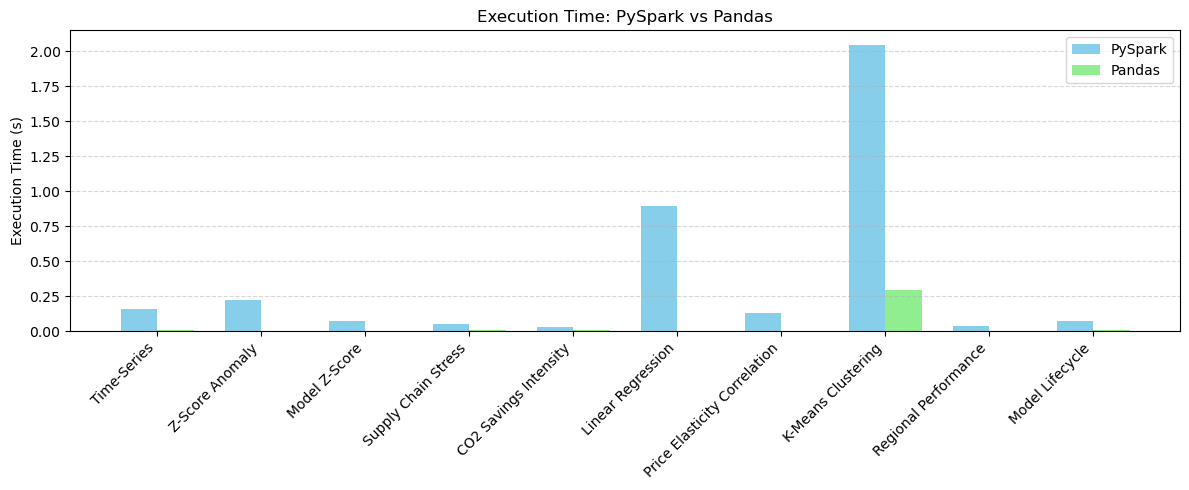

In [13]:
plt.figure(figsize=(12,5))
plt.bar([p - width/2 for p in x], comparison_df['time_pyspark'], width, label='PySpark', color='skyblue')
plt.bar([p + width/2 for p in x], comparison_df['time_pandas'], width, label='Pandas', color='lightgreen')
plt.xticks(x, comparison_df['analytics'], rotation=45, ha='right')
plt.ylabel("Execution Time (s)")
plt.title("Execution Time: PySpark vs Pandas")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Memory

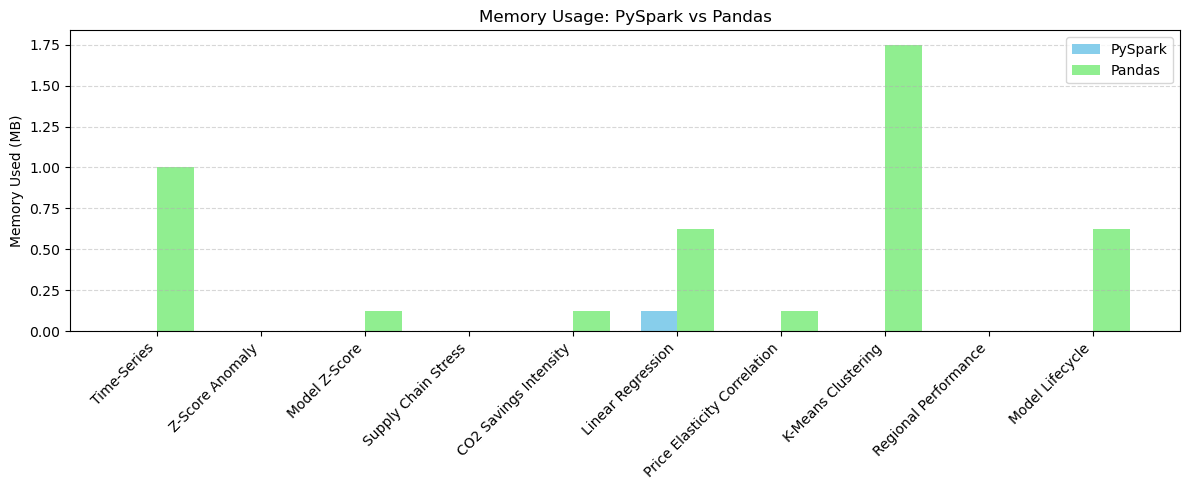

In [14]:
plt.figure(figsize=(12,5))
plt.bar([p - width/2 for p in x], comparison_df['mem_used_MB_pyspark'], width, label='PySpark', color='skyblue')
plt.bar([p + width/2 for p in x], comparison_df['mem_used_MB_pandas'], width, label='Pandas', color='lightgreen')
plt.xticks(x, comparison_df['analytics'], rotation=45, ha='right')
plt.ylabel("Memory Used (MB)")
plt.title("Memory Usage: PySpark vs Pandas")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# CPU Cores

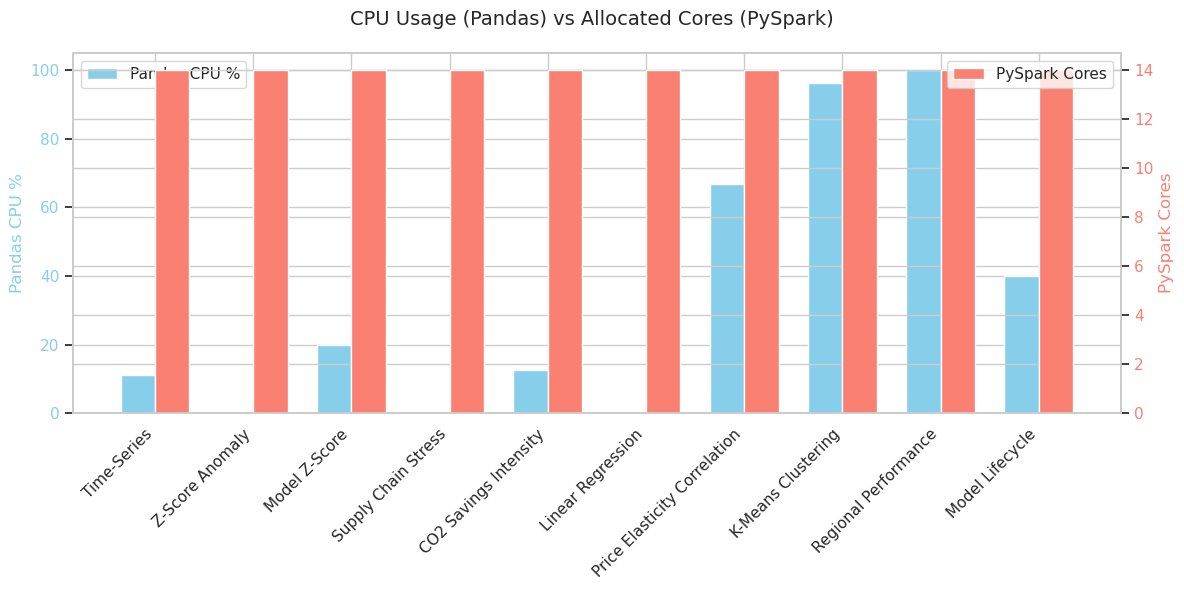

In [19]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar width
width = 0.35
x = range(len(comparison_df))

# Left y-axis: CPU %
ax1.bar([i - width/2 for i in x], comparison_df['cpu_percent'], width=width, color='skyblue', label='Pandas CPU %')
ax1.set_ylabel('Pandas CPU %', color='skyblue')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df['analytics'], rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Right y-axis: PySpark cores
ax2 = ax1.twinx()
ax2.bar([i + width/2 for i in x], comparison_df['cores'], width=width, color='salmon', label='PySpark Cores')
ax2.set_ylabel('PySpark Cores', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Title and legend
fig.suptitle("CPU Usage (Pandas) vs Allocated Cores (PySpark)", fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()